所选数据集为：Wine Reviews——葡萄酒评论，数据集地址为：https://www.kaggle.com/zynicide/wine-reviews；

数据winemag-data-130k-v2.csv中，每条记录由14个变量组成，其中其中7个是标称属性，分别为：country、designation、province、taster_name、taster_twitter_handle、variety和winery ；2个是数值属性，分别为points和price；

对标称属性每个取值变量的频数进行计算，对数值属性进行五数概括（min, Q1, median, Q3, max），并计算缺失值的数目，所得结果如下：

In [1]:
# -*- coding: utf-8 -*-

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../')
import csv
import math

# 输出一个完整的array 不要省略部分
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

# 计算分位数
def my_quantile(data, p):
    pos = (len(data) + 1)*p
    #pos = 1 + (len(data)-1)*p
    pos_integer = int(math.modf(pos)[1])
    pos_decimal = pos - pos_integer
    Q = data[pos_integer - 1] + (data[pos_integer] - data[pos_integer - 1])*pos_decimal
    return Q


In [2]:
filename = '/Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/winemag-data-130k-v2.csv'
header = True
print('[data] read', filename)

# 标称属性
country = dict()
designation = dict()
province = dict()
taster_name = dict()
taster_twitter_handle = dict()
variety = dict()
winery = dict()
# 数值属性
points = list()
price = list()
missing_points = 0
missing_price = 0

with open(filename, 'r') as fin:
    reader = csv.reader(fin)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            # 标称属性
            c = line[1]
            d = line[3]
            p = line[6]
            tn = line[9]
            tth = line[10]
            v = line[12]
            w = line[13]
            # 数值属性
            po = line[4]
            pr = line[5]

            if c in country.keys():
                country[c] += 1
            else:
                country[c] = 1

            if d in designation.keys():
                designation[d] += 1
            else:
                designation[d] = 1

            if p in province.keys():
                province[p] += 1
            else:
                province[p] = 1

            if tn:
                if tn in taster_name.keys():
                    taster_name[tn] += 1
                else:
                    taster_name[tn] = 1

            if tth:
                if tth in taster_twitter_handle.keys():
                    taster_twitter_handle[tth] += 1
                else:
                    taster_twitter_handle[tth] = 1

            if v in variety.keys():
                variety[v] += 1
            else:
                variety[v] = 1

            if w in winery.keys():
                winery[w] += 1
            else:
                winery[w] = 1

            if not po:
                missing_points += 1
            else:
                points.append(float(po))

            if not pr:
                missing_price += 1
            else:
                price.append(float(pr))

        rownum += 1
        # if rownum == 10:
        #     break

# 标称属性的频率

print('========================== country ==========================')
for key in country.keys():
    print(key, ':', country[key])
print('========================== designation ==========================')
for key in designation.keys():
    print(key, ':', designation[key])
print('========================== province ==========================')
for key in province.keys():
    print(key, ':', province[key])
print('========================== taster_name ==========================')
for key in taster_name.keys():
    print(key, ':', taster_name[key])
print('========================== taster_twitter_handle ==========================')
for key in taster_twitter_handle.keys():
    print(key, ':', taster_twitter_handle[key])
print('========================== variety ==========================')
for key in variety.keys():
    print(key, ':', variety[key])
print('========================== winery ==========================')
for key in winery.keys():
    print(key, ':', winery[key])


[data] read /Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/winemag-data-130k-v2.csv
header:  ['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
========================== country ==========================
Italy : 19540
Portugal : 5691
US : 54504
Spain : 6645
France : 22093
Germany : 2165
Argentina : 3800
Chile : 4472
Australia : 2329
Austria : 3345
South Africa : 1401
New Zealand : 1419
Israel : 505
Hungary : 146
Greece : 466
Romania : 120
Mexico : 70
Canada : 257
 : 63
Turkey : 90
Czech Republic : 12
Slovenia : 87
Luxembourg : 6
Croatia : 73
Georgia : 86
Uruguay : 109
England : 74
Lebanon : 35
Serbia : 12
Brazil : 52
Moldova : 59
Morocco : 28
Peru : 16
India : 9
Bulgaria : 141
Cyprus : 11
Armenia : 2
Switzerland : 7
Bosnia and Herzegovina : 2
Ukraine : 14
Slovakia : 1
Macedonia : 12
China : 1
Egypt : 1
========================== designatio

Marquês de Borba : 10
Solar de Serrade : 1
Sot Lis Rivis : 3
Cougar Hill : 6
Vineis : 1
Encell Vineyard : 1
Sierra Madre Vineyard : 41
Incrocio Manzoni 6.0.13 : 2
Amplius : 2
Aragonez : 2
Villa Canlungo : 3
Chardonnay : 5
Pinot Bianco : 3
Clos Victoire : 3
Tibur : 2
Evangelo : 1
Lawrence Vineyards Dry : 2
Quarry Butte Destiny Ridge Vineyards Estate Grown : 2
Bordo : 5
La Rose Saint-Vincent : 2
Isoceles Reserve : 1
Monfrini : 3
Côtes de Morogues : 7
Ryo-Fu : 4
Château la Fleur Poitou : 1
Costalunga : 4
Reserva Cuvée Barcelona 1872 : 2
Family Crest : 4
Canchales Vino Joven : 1
Carpe Diem : 1
Collection : 77
Goose Ridge Vineyard : 1
Selección Tempranillo : 1
Podere : 2
Vasari : 1
Lot 6 : 6
SPÑ : 1
Estate Wine Organic : 1
Ampakama : 9
Falcon Series Estate : 11
Pinta Negra Tinto : 1
Le Paranze : 1
Covello : 3
Premier Cuvée : 9
Humphrey's Vineyard : 2
Pauline's Vineyard Grenache : 6
Ried am Zaum Hefeabzug : 2
Rocche di Castiglione : 14
Vin de Glace : 2
Flor de Muga : 2
Frere Vineyard : 2
Rie

Deen De Bortoli Vat 10 : 1
Coreto : 8
Bubbles Sparkling White Wine : 1
Escolha : 7
Andes Crossing : 1
DB Family Selection : 7
500ml : 11
Clos des Garands : 2
Sélection : 22
Will Jarvis' Science Project : 5
Alazan CJ's Barrel : 3
Cuvée Alexandre Las Kuras Vineyard : 3
Subduction White : 2
Les Beaumonts Premier Cru : 1
Les Damodes Premier Cru : 13
M5 : 7
Family Vineyards : 2
Caratello : 1
Cartizze Dry : 11
Kronos Vineyard : 2
Colson Canyon Vineyard : 18
Cristina Ascheri : 1
Vicar's Choice : 5
Quail Series : 6
Schenkenbichl : 1
Villa Pattono : 1
Le Monache : 1
Alder Creek Vineyard : 1
Marsanne-Roussanne-Viognier : 1
Deseado : 2
Tenuta Del Fant : 2
Sawmill Creek Vineyards North Block : 1
Semi-dry : 1
g Dehesa Gago : 1
Terre Promise : 4
Verité du Terroir : 4
Selvecorte : 1
Klipsun Vineyard Blanc : 1
The Ambassador : 1
Celilo : 2
Brut Reserva Rosé : 2
Anthologia : 3
Stiling Vineyard : 7
Fog Catcher : 4
Fuente Milano : 5
Original Unwooded : 5
The Renaissance of : 2
Haven : 4
Zingy : 5
Les 2 T

I Second Haut Beyzac : 1
Lodolaio Riserva : 3
Robby's : 1
Ventale : 1
Shannon Wood Vineyard : 1
Estate Grown Rosato di : 1
JB Winemaker Series : 4
Eolo Gran Reserva : 1
Veni Vidi Vici : 23
Casal Garcia : 12
Stamp of Australia : 3
Treasure of Transylvania Medium Sweet : 2
Caprice des Rocailles : 1
Freebird : 1
Stagecoach Vineyard Limited Edition Artist Series : 1
Sire : 1
Don Giovanni Estate Grown : 1
Angel Grande Cuvée Rezerva : 1
Leimengrub : 1
Bellugue : 2
Le Second : 2
Le Berger : 2
CV Reserve : 1
Cuvée Prevenche : 3
Vigneto Cialdini : 1
Alabastro Reserva : 3
Grande Cuvée : 25
Cuvée Nathan : 2
The Porterhouse : 4
Finley Vineyard Estate : 2
Jubiléé : 3
Wintzheim : 2
Zerum Riserva Dosaggio Zero : 1
Bannockburn Vineyard : 1
Sophia Gimblett Gravels : 3
Reserve Estate Bottled : 4
Gran Cuvée Satèn : 1
Basalt Block : 4
Almirez : 8
The Gimblett : 1
Highlands Estates Trace Ridge : 2
Botricelli : 3
Branham Rockpile Vineyard : 2
McCrone Vineyard : 5
Zeltinger Sonnenuhr Spätlese : 2
Casal da Se

The Den : 4
Les Echansons : 1
Clos Saint-Théobald Rangen Grand Cru Vendanges Tardives : 2
Saering Grand Cru : 5
Rangen de Thann Grand Cru : 2
Geisberg Grand Cru : 4
Clos Saint Urbain Rangen de Thann Grand Cru : 11
Kastelberg Grand Cru Schiste : 1
The Golden Road Yankowski Weeks Vineyard : 1
Book 17 XVII : 1
A360P Muenchberg Grand Cru : 2
Goldert Grand Cru : 8
Terracea : 2
Kaefferkopf Grand Cru Vieilles Vignes : 7
Rosacker Grand Cru Calcaire : 1
Noble Cuvée Blanc de Blancs Brut : 2
La Sereinite : 1
Grand Vintage Brut : 5
State Ranch : 4
Profundo Red Wine : 1
Angel Gully : 1
Rüdesheimer Kabinett Feinherb : 1
Masut Vineyard : 2
Ockfener Bockstein Spätlese : 2
Johannisberger Erntebringer Kabinett : 1
Extra Dry Particella 68 : 1
Grand Grü : 1
La Dominode Premier Cru : 1
Michele Red Wine : 1
Olivin : 1
Blaufränkisch Cabernet : 1
Elegánce Meek Vineyard Red : 1
Riva Ranch : 2
Atlântico Gold Label Reserva : 1
Obsession : 5
Proposal Block : 1
Mac Cuvée : 1
Village : 3
Clemence : 1
Brazos de los 

Señorío de los Llanos Crianza : 1
Cruzeiro Branco : 1
Syrah-Grenache : 1
Borgeri : 6
Bin Select 462 : 1
Squarcialupi Riserva : 4
P du Roy : 1
Arthus : 1
Brut Satén Millesimato : 1
Reeves Point : 2
Serpentine Meadow : 2
Herbert Vineyard : 2
Paris Mountain Lone Oak Vineyard : 3
Lot 129 : 1
Bellamarsilia : 4
Signature Castillo Vineyard : 1
Tanzen Dame Dry : 2
Bacchus Collection Terraces Estate Vineyard : 1
L&T : 4
Vin Gris of : 10
Rancho Santa Ynez : 2
Le Galoupet : 3
Gamlitzer : 5
The Starbeam : 2
Zephyr Ridge : 5
T26 Federspiel : 2
Emilio Primo : 7
The First Paddock Proprietor's Reserve : 2
Rimauresq : 2
La Petite Etoile Vineyard : 4
Tre Quarti Riserva : 2
Les Crays : 6
Cigarra Reserva : 2
Campopazzo Riserva : 1
Allo : 2
Passadouro : 8
Monsenese Riserva : 3
Mardikian Vineyard : 2
Selectus : 2
Marquês de Marialva Reserva : 3
Vigna Casi : 1
La Tour Chambert Cuvée des Hauts Coteaux : 2
Tertre-Perdigous : 4
Phoenix : 6
The Noble : 2
Dutton Ranch Kyndall's Reserve : 2
Hekate Passito : 1
Bran

Single Harvest : 3
Pas de Nom : 2
Cuvée Louise Brut : 3
Cimarossa Vineyard : 2
Hall Ranch Rosé de Robles : 1
La Porfia Grand Reserve : 2
Symphony 3 : 1
I Macchioni : 1
Lessenziale : 1
Stainless : 5
Scassino : 2
Terra di Lamole : 2
Wightman House : 2
Vigna del Cristo : 2
Haut de l'Hermitage : 3
Les Crêts Premier Cru : 4
La Chanaise : 2
Aux Bouthières : 5
Parada de Atauta : 5
Block 43 Bien Nacido Vineyard : 5
Amaino : 3
Vinyes Velles : 5
Washington State Cuvée : 5
Salacious : 3
The McNab : 5
Clos Varambon : 3
Serraboella : 8
Cookie : 1
Réserve Louis Leyre-Loup : 6
Les Angles Premier Cru : 1
Famiglia : 5
ranga.ranga Estate Grown : 1
Tonel 22 : 3
Adama : 10
Winemaker's Select Bin #5 : 1
Refiano : 3
PerEva : 1
Loggia della Serra : 3
Le Caprice de Clémentine : 2
Pendino : 1
Sairus : 1
Ried Kellerberg Smaragd : 2
Ried Steinertal Smaragd : 1
Cutlass : 2
Aglianico dal Re : 1
Gudarrà : 1
Terrassen 1979 : 1
Nevina : 1
Roza Hills Vineyard Reserve : 1
Moncalvina : 2
Vranac : 1
6 Meses en Barrica : 

StevensDivio : 3
Les Forts de Léoube : 1
Prail : 4
Marie's View Wallula Vineyard : 4
Tribolo : 3
Rubizzo : 2
Grand Reserve Limited Edition : 1
Il Crognolo : 2
Dovev Single Vineyard Kosher : 2
4B : 4
Riserva Vìgnole : 2
Contraste : 1
The Philanthropist Yountville Estate Vineyard : 4
Campidonne : 1
Chorum : 4
Cingalino : 1
Braccale : 3
Abtsberg Superior : 7
Poggio alla Badiola : 1
Jean-Baptiste Kabinett : 1
Gaintus : 1
Aragonez and Touriga Nacional : 1
Capoverso : 1
Laumersheimer Kapellenberg Kabinett Trocken : 1
Rosa de Argentina Rosado de : 1
Roble Oak : 1
Franc : 2
Tête d'Or : 1
Domaine Lenoir : 1
Canova : 4
Zena Crown : 2
Ipso Facto : 5
Gamba Estate Vineyard Old Vine : 1
10 Mile Bridge : 2
Aromatique : 2
Chileno Valley Vineyards : 2
La Terre des Anges : 3
Mille e una Notte : 2
Hylo Vineyard : 2
Clay Court : 6
Prospector's Reserve : 3
Les Montachins : 4
Breechens : 3
The Harvest of Beulah Land : 1
Cardinal Cusanus Stiftswein Wehlener Sonnenuhr Spätlese : 1
S1 Single Block Awatere Vall

Zin Nymph Sophia Favaloro Vineyard White : 1
Reserva Leyda Estate : 1
Rombone Elisa : 2
Valeirano : 6
Catena : 4
Chúcaro : 2
Di'tani : 4
Jardim da Estrela : 2
I Fiori : 5
Jardim da Estrela Branco : 1
Kessler-Haak Vineyard Clone 2A : 1
Block 4SB20 : 2
Solatio : 1
Late Harvest Semillon Ice Wine : 1
Roche Mère Brut  Nature : 1
Made with Organic Grapes Reserve : 4
Petit Albet Made with Organic Grapes : 1
Maximus : 2
Réserve des Coteaux : 1
Mondeco : 1
Gypsy Blanc : 2
Grazia Late Harvest : 1
Brut Zéro Sans Soufre Rosé : 1
Almendros : 2
Vintage Collection Satèn : 1
Cuvée Prestige Rosé : 1
Al di Là : 2
Loiregon : 3
Hey Malbec : 2
Forté : 2
Grand Brut Rosé : 4
La Mezcla Roja : 2
Quailhurst Vineyard : 1
Karneid : 5
Huerhuero : 6
Topgun Cuvée : 1
Mare Nectaris : 3
Bruderthal Grand Cru : 3
Rubelite : 1
The 46 : 2
Nurok : 2
AR Guentota Old Vine : 4
Trittenheimer Apotheke Kabinett : 4
Cuvée J.M. Brut : 1
Nocturne City Lights Demi-Sec : 1
Hoya de Cadenas Brut : 2
Zeltinger Schlossberg Kabinett Old V

Corchaug Estate : 1
Cipressi : 1
Rol de Coisas Antigas : 5
JoLi Estate Vineyard : 1
Quinta da Fronteira Grande Escolha : 3
Viña Cristina y Bibiana Coletto Single Vineyard : 1
Tres Bagos Grande Escolha : 1
Schindler Vineyard : 4
Quinta de Cabriz Four C : 1
Marias da Malhadinha : 2
Vigneto du Lot : 2
Momentos : 1
Chloris : 1
Cuvée Marina : 4
Terra Amata : 8
The Doctors' : 4
Cala N. 1 : 2
Lo Mon : 2
Dry Red : 4
Laietà Privat Gran Reserva Brut Nature : 1
East Ridge : 4
Pietraincatenata : 1
Kastelaz : 3
Vale de Mata Reserva : 1
Kruse Vineyards : 2
Vial : 4
Château de Bellevue Climat les Charmes : 1
Eichhorn : 3
Le Pré du Col Vineyard : 5
de Villiers Vineyard : 3
Malterdinger Bienenberg R GG Erste Lage : 1
Mas des Merveilles : 2
Nocturne Sec : 4
Prélude Brut Grands Crus : 1
Inner Peace : 1
Nodi Brut : 1
Ambrosie Brut Grand Cru : 1
Cara Dry : 1
Cuvée Royale Brut Vintage : 1
Brut Nature Chouilly Grand Cru : 2
Vintage Rosé : 1
Chateau : 1
Ehrhart Brand Grand Cru : 1
The American, Pilot Ridge Vi

Rigoleto : 4
Kosher Reserve Petit Syrah-Zinfandel : 1
Albatro : 2
I Piaggioni : 4
Premius Sauvignon Blanc : 1
The Cork Grove Shiraz and Castelão : 1
Yogev Kosher : 1
Proprietor's Reserve Barrel Fermented : 2
Costello Vineyard : 2
ECO : 3
Method : 2
Grosso : 2
Mission Ranch Vineyard : 2
Château Grand Escalion : 2
Viña Albina Crianza : 1
Cuvée Les Tourelles : 2
Chai de Bordes : 8
Eco Made From Organic Grapes : 1
Terra Rossa : 2
The Gypsy : 3
Clos des Bouveries Brut : 1
Agricola Centolani Riserva : 1
Le Petit Lion : 4
Riserva Gemini : 1
Pian di Conte Riserva : 1
Estate Uniti Red : 1
Teldeschi Vineyard : 6
Talley-Rincon Vineyard : 2
The Ringneck : 3
Conca Tre Pile : 1
Denner Vineyard : 1
Apollo's Folly Rosé of : 1
Sagemoor Reserve Vintage : 1
Firepeak : 5
Stone River : 1
Amaryllis : 2
Levia Gravia : 2
Vigna del Cuculo : 1
Zhu Sha : 1
Ruth on Mars : 1
Pomorosso : 2
Le Deuce : 1
Duarte-Georgetown : 1
Ultra Brut : 2
Vintage III : 1
Poggiomandorlo : 2
Tâm : 1
Sammarco : 4
Beckstoffer Tokalon V

Cape Crest : 4
Cuvée Marlborough Méthode Traditionnelle Brut : 1
Terroir Los Miradores : 2
Ardal Gran Reserva Selección Especial : 2
M-T Reserve : 3
Purbach Sublime : 2
Fortieth Anniversary Vintage : 4
Les Deux Anges : 1
Secret de Léoube : 5
Mon Amor : 1
Sharen's Vineyard : 1
Paso Doble Malbec-Corvina : 1
Hillside Grown : 1
Finest Reserve : 4
Roumiguiere : 1
Perlae Naonis Brut Millesimato : 1
Fine Ruby : 5
Georgetown Divide : 1
Wallace Creek Vineyards Reserve : 2
Marie-Antoinette : 3
50 Year Old Vines : 1
Meiomi : 3
Vértice Cuvée Reserva Bruto : 1
Donna Lisa Riserva : 2
Ñeque : 1
Gelbling Reserve : 1
Turas : 4
Galpin Peak : 2
The Lucky Lizard : 4
Mavie : 2
Essentia Loci : 1
Reposado : 6
Les Illustres Sur Lie : 1
Old Camp : 2
Tomahawk Vineyard : 4
Mas de Merveilles : 1
Tonel 22 Reserva : 1
Reserve Bacigalupi : 1
Heart Hill Vineyard Estate Grown : 1
Luis Pereira : 1
Catie's Corner : 6
Muns Vineyard : 5
Eight Barrel : 2
Day Ranch Vineyard : 1
Méthode Traditionelle Brut Rosé : 1
Mirabelle 

Opere Millesimato Metodo Classico : 1
Grand Cru Non Dosé : 1
Coeur de Gamay : 2
Rabelo Pierce Ranch : 1
Dolomite : 1
Cellar Select : 7
Extra Dry Millesimato : 2
Estate Grown and Bottled Unfiltered : 3
Rive di Collato : 1
Alexandre Premier Cru Brut : 1
Opere Serenissima Metodo Classico : 1
Vincent Brut : 1
Comte Audoin de Dampierre Cuvée des Ambassadeurs Brut : 1
Quadrus : 1
Paul Delane Brut Réserve : 1
Belcanto Dry : 1
Gravitas : 1
Henry's Keep Proprietary Red Wine : 1
Santa Caterina : 3
Villa Bossi Riserva : 1
Saporoia : 6
I Sodi del Paretaio Riserva : 2
Runaway Red : 2
Money Road Vineyard : 2
Beau Geste : 1
Aurora Oloroso : 1
Sevens424 : 2
Abadía de San Campio : 3
The Ramparts : 2
Domaine de Clairfont : 2
Red Willow Vineyard Cabernet Franc : 1
Colfondo Anfora : 1
Rocche del Castelletto : 1
Les Hauts d'Eole : 1
Joséphine : 1
Marne Brune : 1
Chardakhi White Dry With Skin Contact Unfiltered : 1
Terrarossa Riserva : 1
Aux Forches : 1
Obizzo : 1
Eliseo : 3
Etichetta Blu : 1
Reserve Cavali

Tosco Forte : 1
Matchless Red : 2
Shibumi Vineyard : 1
J. Alberto : 1
Monteverro : 1
Domaine Grand Veneur : 4
Art Bus : 1
Quinta da Fronteira Reserva : 4
Hummingbird Hill Vineyard : 4
Les Acacias : 2
Cuvée Viva : 3
Barrancôa : 2
Super Hudson : 1
Pfaff : 1
Cote del Sol : 1
Onesta Secco : 1
Passion of Portugal Reserva : 3
Anne de K Patergarten Old Vines : 1
Double Impact : 2
Periquita Original : 4
Passerina : 1
Grand Brut : 4
Grande Cru Brut : 2
Prestige Brut Rosé : 1
Demoiselle Tête de Cuvée Rosé : 1
Gold Label Brut : 1
Feliz Vineyard : 7
Drummond Vineyard : 2
Brut Reserve Natural : 1
Cuvée Raventos : 1
Diamant Blanc Blanc de Blancs : 1
Champs-Pimont Premier Cru : 1
Feral : 2
Tenuta Secolo Cerequio : 1
Lost Soul : 1
Villero Riserva : 2
Fonte : 5
Grande Cuvée No. 8 : 1
Serpico : 7
Sycamore Vineyard : 6
Reserva Edición Especial Sergio Hernández : 1
Crouzeilles-Côte Abeilles : 1
Hughes : 1
The Butcher : 2
au Naturel : 2
Seigneur de Grézette : 1
The Maneater Derby Vineyard : 3
Story Vineyar

Heather's Vineyard : 5
Nicholas' Vineyard : 1
Basilica del Pruneto : 2
Primoris : 1
Casa de Vinas Long Row Heine : 1
Parr Vineyard : 3
Siepi : 2
Crocus : 1
Wedding Block : 1
Fiorano Bianco : 1
Strasser Weinberge : 2
Le Marquis de Calon Ségur : 2
Black Edition : 4
Anna-Christina : 4
Matar : 3
Castello d'Alba : 1
Tasmin : 1
Shou : 1
Estate Semi-Dry : 1
Impulse : 1
Vintner's Blend : 2
Eitan Assemblage : 1
Smith Cullam : 1
Two Steps : 2
Unoaked Conner Lee Vineyard : 1
Russian River Selection Rosé of Pinot Noir : 1
Kiedrich Gräfenberg Erstes Gewächs Trocken : 3
Katharinas Reserve : 1
Ungsberg : 1
The Stalker : 3
Ben Schild Reserve Single Vineyard : 1
Wild Oak Vineyard : 1
Il Tascante : 1
Estate Quattro Mani Rosé of : 1
Laughing Pig Pinot Noir : 1
La Renardière : 1
Oak Aged 6 Months : 1
Bubbles by Lobetia : 1
Rosat : 3
Marina Alta Gran Selección Blanco : 1
Honoro Vera Organic : 1
Cachito Mio : 1
Selección Braille : 1
Helwig Vineyard Reserve : 1
Windspiel : 1
Auntie Meredith's Picnic Blend : 

Klassik Fasangarten : 1
Bin 61 : 2
Grauburgunder Steirische Klassik : 1
Firehouse Red : 2
Zeal : 2
Domaine de la Ferté Servoisine Premier Cru : 1
Pilot Ridge Vineyard Estate Grown : 1
Blancaneaux : 3
Rhapsody Reserve : 1
Happy Canyon VIneyard : 1
Cabo de Hornos : 2
T Bar T : 1
Sunshine Vyd : 1
Monte Rosso Vyd : 1
Richard Chambers Vineyard : 1
Moon Mountain Reserve : 1
Diamond Mountain Ranch Vyd : 1
Roureda Llicorella Anyada Clássic : 2
Canneto : 2
Russian Camp : 2
Rüdesheim Berg Roseneck Kabinett : 3
Leonardini Estate : 1
Stupor Mundi Riserva : 1
Predappio Riserva : 1
Rockpile Ridge : 2
Diciotto : 1
Clos les Grands Voyens Premier Cru : 1
Pinot Meunier : 2
Jane's Vineyard Dijon Clone 115 : 2
Zephyr Private Reserve : 2
Scancio Private Selection Vinhas Velhas : 2
Notre Dame des Champs : 6
Verbatim : 1
Eloquent : 2
La Prima Gran Selezione : 3
T Bar T Ranch : 3
Blush de Noir : 1
Passeport Lobster & Shrimp : 1
Clarete : 1
Domaine Les Hautes Roches : 1
El Taxi : 1
Genius Loci : 2
Terroir Gasc

Saralee's Vineyard & Genetti Vineyard : 2
Portada Rosé : 1
Bianco Di California : 1
Quail Series Fumé Blanc : 1
Tinto Barrica : 1
Casa da Passarella A Descoberta Colheita : 2
Cape Roca Boat : 4
Carpoli : 1
SOLO : 7
Mersault-Charmes Premier Cru : 3
Arcturus : 2
La Cengia : 3
Il Poggio dei Vigneti : 1
Terras de Felgueiras : 1
Estate Grown Dry : 2
Sans Soufre Ajouté : 1
Viña Real : 4
Dark Phantom : 1
Les Hauts de la Gaffelière : 3
Les Rochettes : 1
Culloden Vineyard : 3
Family Estate Vineyard : 2
Poggio Bidini : 1
Hell Raiser : 1
Rosato Romantico : 1
Quinta de Roriz Vintage : 1
Les Combettes : 4
Clos Saint Landelain Vorbourg Grand Cru : 1
Campo Leon : 1
Comtes d'Isenbourg Brut : 1
La Grola : 2
Amancaya Gran Reserva : 1
Kremser Pfaffenberg : 1
Reserve Tempranillo- : 1
Noemía : 1
Pomele 500ml : 1
Stillwater Creek Vineyard The Wanted Red : 1
Mounts Vineyard : 4
Carnuntum Cuvée : 2
Seven Hills Vineyard Estate Vineyards : 2
Domaine Mas Thérèse : 2
Privat Laietà Rosé Gran Reserva Brut Nature : 

Les Terroirs : 1
Old Vine Estate Bottled : 1
Val di Suga Riserva : 1
La Vigne d'Or Extra Brut : 1
Le Chiuse di Sotto Riserva : 1
Pian Bossolino Riserva : 2
Phenomena Riserva : 4
Stephanie's Cuvée : 2
Coombsville Cuvée : 1
Metoxi Chromitsa Limnio-Cabernet Sauvignon : 1
Limnio-Merlot : 1
Nero di Vite : 1
Lawer Family Betsy's Vineyard : 2
Rosso Bello : 2
Sandara : 1
Domaine le Pive Gris : 1
Domaine le Pive Vie de Bohème : 1
Vila Santa Loios Tinto : 1
Château d'Ouilly : 1
Ca' Secco : 2
Credencial : 1
Castello d'Alba Colheita Branco : 1
Lily Pad White : 2
Cuerno : 1
Lot 8 : 2
Critone : 2
5 Blocks Wren and Temperance Hill : 1
Maurus : 2
Dürkheimer : 1
Barricia Single Vineyard : 1
Masdeu : 1
Lago di Caldaro Classico Superiore De Silva PeterLeiter : 1
Hexenbichler : 1
Auge Riserva : 1
Dory Colheita Branco : 1
Phases : 1
Predicat : 2
Bridgewater Mill : 1
Semillon-Sauvignon Blanc : 1
Vin Doux Viognier Kay : 1
Dominio de Valdepusa : 2
West Side : 1
Collage - Zinfandel/Shiraz : 1
Finca Rosa : 2
Sc

Rocca : 1
1870 : 1
The West End : 2
Ginestra Casa Maté : 1
15 Reserva : 1
Badarina : 4
Beckstoffer G III : 1
Church Creek Steel : 2
Vintners Select Sangiovese : 1
Cuvée Beatrice : 1
Three Vineyard Cuvée : 2
Century Vine : 1
Verga Collection : 1
Frog Rock Vineyard : 1
Vallée des Jardins : 2
Cape White : 1
L Vineyard : 1
Les Grenouilles : 1
Domaine de la Moutonnière : 2
Innovazione : 1
Alter Ego : 1
Biberius : 1
Amedeo : 1
Hoopla Unoaked : 1
El Rincón Estate Bottled : 1
Private Stash #10 : 1
Lubenko : 1
Version Anna's Estate : 1
Quinta da Aveleda Estate Bottled Loureiro-Alvarinho : 1
Lazzarito : 5
Albesani Santo Stefano Riserva : 2
Richelieu : 1
Gold Vineyard : 1
Montaria Reserva Tinto : 1
Old Vine Tamura Vineyard : 1
Estate Select Gamache Vineyard : 1
Specialties Ocean Side : 1
Black and Blue : 1
Bud Burst : 2
Richard McDowell Vineyard : 2
Granite Hill Vineyards : 1
Duo Blanc : 1
French Kiss : 1
Alto Río Joven : 1
Zephyr's Block : 1
La Châsse Prestige : 1
Sumi's : 1
Vintner's Select Enc

Calcáreo Coluvio de Altamira : 1
Jory Hills Vineyard : 2
Prodigo Gran Cosecha : 1
Guy James : 1
Malombra : 1
Tinto Pesquera : 1
Laudun Blanc : 1
Scharlachberg Bingen GG Trocken : 1
Kinien de Don Raúl : 3
Leopardi Brut Nature : 1
Bosco del Falco : 1
Château Gramond : 1
Château Moulin d'Ulysse : 1
Seventeen Forty Reserve : 2
Collaboration Series Force Majeure Vineyard : 3
Edición Limitada B : 1
Domaine Saint-Rémy Schlosberg Grand Cru : 1
Eastside : 2
Betsy's Backacher Bottle Blond : 1
Alegría Vineyard Heritage Vines : 1
Single Vineyard Reserve Kosher : 2
Grand Cru Saering : 1
Nouvelle Vague Nummer 9 Trockenbeerenauslese : 1
Zwischen den Seen Nummer 10 Trockenbeerenauslese : 1
Moon Select : 1
The Creator Old Stones : 1
The Hustler : 2
Nouvelle Vague Nummer 8 Trockenbeerenauslese : 2
Sea View Ridge Estate Vineyard : 2
R Reserve : 1
Berg Roxheim Erste Lage Trockenbeerenauslese : 1
Philip : 2
Casa Real Estate Bottled Old Vines : 1
Sauberg Reserve : 1
Raubern : 1
LaCruz : 1
Extra Brut Late Di

Unaoked : 1
Barrelman's Select : 1
Brutal : 1
Le Charmel : 2
Two Dogs A Peacock And A Horse : 1
Dulce Tinto : 1
Osborn Ranch : 1
Estate Grown Cabernet : 1
Chenin-Colombard : 2
7200 Grassini Vineyard : 1
Sonnet 98 : 1
Su Reimond : 1
Re Teodorico : 1
Aux Champs Perdrix Premier Cru : 2
Domaine des Perdrix La Perrière Premier Cru : 1
Deadbeat : 2
Reserve Red Hills Ranch : 1
Terrible Beauty : 2
Great Estates : 1
Selection Reserve Jacques de Conink : 1
Late Harvest Riesling : 1
Fino Sherry : 1
Crianza - Estate Bottled - Finca los Trenzones : 1
Mauvais Garçon : 2
When We Dance : 1
Potrait : 1
Vintage 41 : 1
Aska : 2
OG De Autor Reserva : 1
Negre De Negres : 1
Vaudevey Premier Cru : 1
Sonnentropfen Wachenheimer Feinherb : 1
Jaden and Keira's Cuvée : 1
Clássico Garrafeira : 1
Aït Souala : 1
Primus Inter Pares Monette's Vineyard : 2
Clone 32 Split Rail Vineyard : 1
Qvinterra Trocken : 2
Opulento : 1
Podere Il Caio : 1
Ardal Crianza Vendimia Seleccionada : 1
K de Kirwan : 3
Bricco Buon Natale : 2

Bricco Rioglio : 1
Domaine du Vieux Moulin : 1
Saviezza : 1
Larry Venturi Vineyard : 1
Domino : 2
Poetic Pinot : 1
La Coupelle Single Vineyard : 1
Schlossberg Grand Cru Cuvée Saint Catherine : 1
Gran Reserva 890 : 1
Latifeh : 1
Rangen Grand Cru Clos Saint Théobald Sélection de Grains Nobles : 1
VV 47 : 1
Rangen Grand Cru Clos Saint Théobald Sélection de Grains Nobles Larme de Lave : 1
Vigna Vicini Reserve : 1
Woolsey Road : 1
Tilting at Windmills XL Vineyard : 1
Kaskal Extra Brut : 1
Jewel Collection : 1
Original Blend 1871 : 1
Ried Gola : 1
Berrichon : 1
QP Reserva : 1
Lieu-Dit Ter Pointe : 2
Vintage Select Solo Dancer : 1
Vaquero Vineyard : 1
Orgaz Zinfandel : 1
Barrel Fermented Reserve : 1
Adobe Red : 1
Rosa Regale : 1
Valley Oaks White : 1
Red Sweetie Glaciers End Red Table Wine : 1
Grande Rosé Brut : 1
La Libresca Santa Barbara Highlands Vineyard : 1
Brut de Brut Reserva : 1
Rosat Brut Reserva : 1
Maynard's Late Bottled Vintage : 1
Caseo Brut Pinot-Chardonnay : 1
Fleur de Gamay : 

GPS : 2
Le Petit Chenin No 11 : 1
Glacier Ridge : 3
Cuvée Giuseppe : 1
J. Schram Rosé : 3
Aÿ Vauzelle Terre : 1
Dizy Corne Bautray : 1
Turckheim Clos Jebsal Vendanges Tardive : 1
Vigneto di Monte Lodoletta : 2
Avize Champ Gain Brut : 1
Bosan : 3
Clifton Hill : 1
Finlayson Family Vineyards : 1
Negraró : 1
'A Rina : 1
Schwaigerner Ruthe Grosses Gewächs Trocken : 1
Trittenheimer Kabinett : 1
Starlette Blanc : 1
La Encantada Vineyard - Clone 667 : 1
Falù : 1
Tréje : 1
Basor Terrace Vineyard : 1
Old Fashioned Superstition Tierra Alta Vineyard : 1
Bramito : 1
Grande Réserve Vieilles Vignes : 1
I Unacepa : 2
Tres Bien : 1
Galitzine Vineyard : 3
James Berry Vineyard : 1
Jochinger Berg Federspiel : 1
Hochrein Smaragd : 1
Sorella Red Wine : 2
Arèle Vino Santo : 1
Manchester  Ridge Vineyard : 1
Transformation Proprietary Blend : 1
Weissenkirchner Achleiten Smaragd : 1
James Berry Vineyard Bone Rock : 1
Creation Demi-Sec : 1
Unendlich Smaragd : 1
Doña Isidora : 1
Château L'Hospitalet Reserve La Cl

Schrattenthal 9 : 1
Misco : 1
Avaton : 2
Biblinos Oenos : 1
Merlettaie : 1
Loibner Smaragd 500ml : 1
Cabernet Franc Carmenère : 1
Le Méal Ermitage : 1
Herb Lamb Vineyard : 1
SLV : 1
Maya : 1
La Mouline : 1
La Turque : 1
Empreintes : 1
Chevalier de Sterimberg : 1
Les Bessards : 1
Sabbie di Sopra il Bosco : 2
Piesporter Goldtröpfchen Trocken GG : 1
The Blend Limited Edition : 2
The Mackenzie : 1
Geyerscheiss : 1
uQamata : 1
Dillian Ranch : 1
Red Hen Ranch : 1
The Chocolate Block : 1
Bombacher Sommerhalde R Trocken : 1
Ranch Reserve : 1
Lucchine : 1
Tour'ga Franc Reserve : 1
the pilgrim : 1
Autumn Chase : 1
Col Matiss : 1
Quintessence Vieilles Vignes : 1
Rüdesheimer Halbtrocken : 1
Il Ladro : 1
Fuchsentanz : 1
Les Trois Versants Vieilles Vignes Sur Lie : 3
Miraflores Vineyards : 1
Bien Nacido Vineyard Homage Collection : 1
Les Petits : 1
Marqués de Toro Finca la Moura : 1
Koinè : 1
Bühlweingarten : 2
Trifecta by Louis de Coninck Estate Bottled : 1
Sdricca di Manzano : 1
Château de Selle C

Alcanta : 3
Señor Sierra de Alicante : 1
Il Clou : 1
Primaio : 2
Champ Secret : 2
Estate Cuvée Rosé of : 1
Estate Rosato di : 1
Emily May Pinot Noir : 2
Pizzella : 2
Weinkellerei Kabinett : 2
Muddichi di Suli : 1
Vinha do Reino Reserva : 1
Grande Cuvée Brut Millésime : 1
Poças Reserva Branco : 1
Stormy Morning Vineyard : 1
Shorthorn Canyon : 1
Bebop : 1
Gulf Station : 2
La Matinière : 1
Pojega : 1
Ètim Varema Tardana Negre : 1
Sawyer Lindquist Vineyard Sonnie's : 1
Monte Gradella : 1
Opere di San Pietro : 1
80 Year Old Vines : 1
Monte Cà Bianca : 1
Vigna Monte Danieli : 1
Dutton Ranch-Rued Vineyard : 1
Serpentine Meadow Port : 1
Vigneti di Ravazzól : 1
Les Meslaines Grand Cru Brut : 1
Selecti : 1
Pure Brut Nature : 1
Brut Grand Cru Blanc de Blancs : 1
Demestica Semi Dry : 1
Vigna Senza Nome : 1
Finca Valdehierro 16 Meses Barrica : 1
Symphonie de Haut-Peyraguey : 1
Relais de la Dominique : 1
Three Crowns : 1
Lindes de San Vincente : 1
Longtable Vineyard : 1
Henricsson Vineyard : 1
Poggi

D Millésimé Brut : 1
Bien Bien : 1
L'Audace Brut Nature : 1
Scharzhofberger Trocken Grosse Lage : 1
The Unknown : 1
Petirrojo : 1
La Palma Reserve : 1
Highland Series Reserve : 1
Cabernet Sauvignon Blaufränkisch : 1
The Dancing Chef : 1
314 Rosé Clone Select : 1
Malvasia-Verdejo : 1
Los Robles Vineyard : 1
Bianca Mia : 1
Watts Vineyard : 1
Friars' Vineyard : 1
The Bohemian Harvest Moon Vineyards Dry : 1
Zafir dulo : 1
Bryan Creek Vineyards : 1
La Burgondie Brut Réserve : 1
Once Upon a Time Szamorodni Sweet : 1
Hangtown : 1
Élevé : 1
Riserva San Pietro : 1
Rosé 83 : 1
Perle by Roseline : 1
Air de Famille : 1
Quinta da Terrugem : 1
Rio Vista Vineyard Calera Clone : 1
Kalkmergel Spätlese Trocken : 1
Vin de Pistolet d'Obernai : 1
Rector Creek Vineyard Block 4 : 1
Red Dog Vineyard Dijon Clone 115 : 1
La Loggia del Cavaliere : 1
Terzetto Estate : 1
Coquelicot Vineyard : 1
Sister's Forever Unoaked : 1
Brut Nature Millesimato : 1
Le Moulin en Gascogne : 1
Les Clavelles : 1
Reserve - Barrel Fer

Nina Lee Estate Grown : 1
The King's Favour Waihopai : 1
Enseignères : 1
Astel : 1
Bien Nacido Vineyard Proprietor's Reserve : 1
Cardiac Hill Vineyard : 1
Sottocastello di Novello Riserva : 1
Clos de Capelune : 1
Château de Pocé : 1
Platinum Spätlese : 2
Oscar's Red : 1
Ardósia Rosado : 1
Perrydale Hills Vineyard Pinot Noir : 1
First Bridge : 1
Bodysgallen : 1
Silver Mine : 1
Domaine de Villargeau : 1
Domaine Barcelo : 1
Novum : 1
Otra Piel Gualtallary Suelo Gen Fuerza Tranquila : 1
Nathan : 1
Third Generation 70th Anniversary : 1
Gioia Rosato d' : 1
Alexandria's Cuvée : 2
Archimage Red : 1
Cuvée Alexi : 1
Rossignol : 1
Quinta da Mimosa : 1
Terras do Pó Syrah-Petit Verdot : 1
La Vigne d'Albert : 1
Golden Boar : 1
Laire Riserva : 1
Vivacious Viognier 76%/Roussanne 24% : 1
Reserve Momentos Viogner Sauvignon Blanc : 1
Lot 92 Reserve : 1
Istrico : 1
Estate Ravazzi Vineyard : 1
Cuvée Mousseux Brut : 1
Les Otéliées : 1
Jones Block Single Vineyard : 1
Vigna Giaia Riserva : 1
Les Charmières Pr

Le Bélier Blanc : 1
Separa : 1
Bulles de Brigue Brut Nature : 1
Riebli Valley Vineyard : 1
Ruben's Blend : 1
Ciclos : 1
Les Cerisiers Vieilles  Vignes : 1
Justice : 1
Ritme Vinyes Velles Boniques Garnatxa-Carinyena : 1
Coteau de la Biche : 1
Cuvée Jean Vieilles Vignes : 1
Louise B. Cuvée Prestige Brut : 1
Jon Boat : 1
Ried Steinsetz Reserve : 1
Broken Axle Stagecoach Vineyard : 1
Alatus Blend : 1
Villa Antinori Riserva : 1
Moritz : 1
Tabor Reserve Die Räritat : 1
Straw Wine : 1
Monument Ridge : 1
Helena Dakota : 1
Estero Vineyard : 1
The Estates Clifton Vineyard : 1
Limited Resources : 1
Ava : 1
Clos Rogue Valley Reserve : 1
Paul-Edouard : 1
Ellen's Vineyard : 1
Sandro : 1
Allegra : 1
Terre di Lavinia : 1
3 Puttonyos Aszú : 1
Sorelle Per Sempre Sisters Forever Un-Oaked : 1
Agoghè : 1
Melacce : 1
Rapaura Reserve : 1
Le Maestrelle : 1
Idyll : 1
Micro-Lot Reserve Hayes Ranch : 1
Domaine de la Brossette : 1
Propuesta : 1
The Vociferate Dipsomaniac Single Vineyard : 1
Matane' : 1
Mavro : 1


Ventosa : 31
Lamoreaux Landing : 93
Leyda : 49
Madonna Alta : 2
Marchesi Antinori : 42
Marchesi de' Frescobaldi : 44
Martin Ranch : 50
Ornellaia : 8
Pardon et Fils : 11
Piña : 27
Podere Ciona : 4
Poggioventoso : 4
Pull : 7
R2 : 22
Rideau : 33
Tenuta Forconi : 3
Dopff & Irion : 64
Ceretto : 40
Matrix : 20
Mauritson : 19
Henry's Drive Vignerons : 18
Silverado : 45
Le Riche : 4
Pierre Sparr : 52
Kuentz-Bas : 85
Camberley : 5
Delheim : 3
Poderi Luigi Einaudi : 24
Clark-Clauden : 3
Giacomo Ascheri : 6
Lassègue : 1
Beaumont : 10
Poderi Colla : 17
Banyan : 2
Domaine Zind-Humbrecht : 101
Terra Valentine : 43
Testarossa : 218
Vincent Vineyards : 4
Weingut Liebfrauenstift : 11
Wrath : 45
Yardstick : 3
Herdade Grande : 29
Albatross Ridge : 7
Alta Colina : 19
Marques de Griñon : 39
Big Basin : 43
Carl Graff : 8
Casa Santa Vitória : 11
Castello di Gabbiano : 22
Castello Romitorio : 19
Château Vincens : 8
Chronic Cellars : 28
Claiborne & Churchill : 38
Collin-Bourisset : 11
Conde de Velázquez : 6
Co

Domaine Anderson : 13
Dowsett Family : 9
Feudo Antico : 4
Gamache : 43
Paumanok : 33
Broken Clouds : 3
Browne Family Vineyards : 41
Castillo De Feliciana : 21
Château Amour : 6
Château de Cruzeau : 5
Château de Paillet-Quancard : 6
Château de Rochemorin : 6
Gabriel Meffre : 25
Alta Vista : 39
Aymara : 6
Paul Buisse : 8
Saget la Perrière : 32
The Williamsburg Winery : 45
Valentin Bianchi : 66
Gruet : 10
Jean-Max Roger : 15
Magnum Vinhos : 37
Blue Valley : 6
Vinadeis : 8
Gnarly Head : 39
Ca' Momi : 38
Domaine de Reuilly : 3
Enoport : 17
Tie-Dye : 2
Il Chiosso : 2
Grayson : 24
Leaping Lizard : 11
Portal del Montsant : 16
Decoy : 39
Xanadu : 10
Adega Mãe : 41
Aniello : 7
Oak Knoll : 27
Parras Wines : 23
Château Lanscade : 1
Château Troupian : 1
Cliff Creek : 20
Del Rio : 39
Delfino : 13
Gru : 1
First & Local : 3
Amalaya : 5
Half Mile Creek : 2
California Republic : 2
Cantina Valle Tritana : 2
Château Doms : 3
Château Pindefleurs : 2
Réserve des Oliviers : 3
Tardieu-Laurent : 51
Sant Agnese

Domaine Huët : 11
Donelan : 14
Beckmen : 20
Viento : 16
Wine Spots : 14
Elyse : 36
Francis Tannahill : 8
Masciarelli : 17
Castle Rock : 80
Château Moncontour : 28
Derbes : 2
Frog's Leap : 35
Hellbent : 1
Sesti : 13
Las Colinas Del Ebro : 8
Anciano : 6
Avery Lane : 2
Beltane Ranch : 7
Bodegas Docampo : 1
Domaine Henry Pellé : 2
El Burro : 1
Enkidu : 10
Valle de Salinas : 2
Villa San Juliette : 21
Plaisance Ranch : 35
Poggiobello : 10
Previous : 6
Primosic : 12
Quinta da Romeira : 10
Roche : 13
Ronco dei Tassi : 11
Sauvion : 37
La Rajade : 10
La Tunella : 23
Louis de Grenelle : 4
Meadowcroft : 11
Mignanelli : 9
Monteviejo : 20
Nisia : 5
Sarah's Vineyard : 55
Tenuta di Angoris : 14
Don Cristobal 1492 : 4
Finca El Origen : 37
Glen Ellen : 23
Manzanita Creek : 9
Montepio : 2
Notro : 10
Ochoa : 27
Starmont : 26
Brophy Clark : 13
Caligiore : 20
Cedar Mountain : 8
Concannon : 73
Solar de Urbezo : 2
Yellow Tail : 19
Adega Cooperativa Ponte de Barca : 9
Pasaje Alto : 1
Figaro : 4
Fattoria di Cas

Red Car : 21
René Muré : 46
Sottimano : 14
Wiston Estate Winery : 6
Mt. Brave : 9
Onesta : 8
Palmina : 23
Brovia : 16
Casa Donoso : 8
Domaine de la Petite Cassagne : 6
Duemani : 12
Lawrelin : 7
Nacido del Quórum : 2
Domaine Chandon de Briailles : 2
Gorman : 65
Coquelicot : 31
Domaine Henri Gouges : 3
Domaine Parent : 4
Atlas Peak : 5
Robert Craig : 15
Domaine de Courcel : 2
Kessler-Haak : 31
La Collina dei Lecci : 11
Schwarzböck : 21
ZaHa : 7
Hubert Weber : 5
Château Andron Blanquet : 2
Château Charmail : 5
Château Grand Bertin de Saint Clair : 2
Château la Patache : 4
Château Lestage Simon : 10
Louis Métaireau : 3
Dancing Coyote : 7
Chamonix : 4
Hamilton Russell : 10
Bastianich : 10
Clos Triguedina : 3
Oak Grove : 38
Pago de los Capellanes : 6
Phelps Creek : 19
Producteurs Plaimont : 48
Black Rock : 2
Bodegas Vidal Soblechero : 4
Pieve Santa Restituta : 5
Hawley : 18
San Filippo di Giannelli : 3
Smashberry : 5
Terre Nere di Campigli - Vallone : 3
3 Horse Ranch Vineyards : 31
Baron De 

Taron : 14
Almquist : 29
Aspaldi : 4
Biegler : 2
Carravid : 1
Château Croix de Mission : 3
Château du Juge : 2
Latah Creek : 20
Golser Wein : 5
Château d'Orschwihr : 3
Saggi : 7
Scheid Vineyards : 6
Iby : 10
Mas Amiel : 1
Arrocal : 18
Rombauer : 14
Domaine Sylvain Pataille : 8
Vidon Vineyard : 20
Villa Raiano : 22
Bella Bollè : 4
Tierra Prometida : 2
Stonegate : 6
Tapiz : 29
Two Oceans : 7
Domaine Thierry Mortet : 2
Garnet : 10
Arbiola : 4
Quackenbush : 2
Tango Reàl : 2
Earthquake : 10
Artisan Uprising : 3
Bodegas Imperiales : 3
Domaine Coudoulis : 3
Weingut Weber : 5
Castello di Meleto : 19
Cecchi : 23
Diadema : 7
Zacharias : 4
Espana Robles : 2
Molí dels Capellans : 1
Plozza : 4
Clos des Verdots : 1
Domaine de la Tour Boisée : 1
Domaine du Moulin Berger : 1
Meerlust : 7
Mommessin : 20
Valle : 2
Black Pearl : 2
Diamond River : 2
Enjoie : 1
Gracia de Chile : 8
Recoletas : 2
Viña Costeira : 8
Pueblo del Sol : 4
Brüder Dr. Becker : 2
Caves Cooperatives de Donnas : 1
Edetària : 7
Weingut 

Forti del Vento : 1
Château Plaisance : 7
Castello dei Rampolla : 8
Clos de la Tech : 12
Spottswoode : 7
Il Colle : 4
Langmeil : 13
Matthias Müller : 3
Scriani : 7
Finca Torremilanos : 11
Lorca : 1
Ackerman : 7
Boxwood : 12
Colinas do Douro : 13
Dehlinger : 10
Charles-Gilbert de Vindé : 5
Harper Voit : 10
Michaud : 7
Monte da Capela : 2
Pulchella : 14
Müller-Grossmann : 15
Sidebar : 8
Foxes Island : 5
Liana Estates : 2
Domaine Ellevin : 9
Dominio IV : 10
Croft : 12
Masari : 1
Diamond Ridge Vineyards : 3
Riebeek Cellars : 8
Bodegas Aragonesas : 18
Château Cadillac : 2
Duca del Frassino : 7
Durbanville Hills : 7
HammerSky : 21
Suncé Vineyard & Winery : 8
Grand Bourgeau : 2
Ressia : 7
Torlasco : 4
Jed Wines : 4
Las Rocas de San Alejandro : 5
Maison Malet Roquefort : 6
Monfort-Bellevue : 1
Château Timberlay : 10
Château Tour de Guiet : 4
Beronia : 20
District : 1
Bossy Boots : 3
Diliberto : 4
Impostino : 3
Camp : 10
Fattoria Il Muro : 3
Terre di Talamo : 21
Hillersden : 3
Williamson Vineya

Jindalee : 3
Altoona Hills : 1
Gantenbein : 3
Snowy Peaks : 1
Domaine Montrose : 4
Erzetič : 5
Fire and Oak : 2
Cascina Morassino : 12
Katarzyna : 4
Alterra : 1
Vignoble Charmet : 1
Eye Candy : 4
Conquista : 4
Lola : 2
Denario : 6
Cooper Station : 5
Sexy Wine Bomb : 1
Inkling : 1
Pessimist : 3
Finca 8 : 2
Four Paws & A Tail : 3
Maisonry : 8
Shenandoah : 10
Colores del Sol : 2
Reverie : 15
Valance : 1
Yorba : 14
Aurielle : 2
Blair Fox : 6
Château Pibran : 6
Trio Vintners : 12
Alana Estate : 4
Artner : 14
Cantina Novelli : 6
Château de Pourcieux : 9
Michael Shaps : 12
Moncigale : 9
Ostler : 1
Rock View : 3
Rocky Gully : 2
Quinta do Noval : 23
La Marcellina : 1
Viticcio : 17
Butting Heads : 1
Château des Demoiselles : 12
Marilyn : 7
McConnell Estates Winery : 2
Mayacamas : 12
Lancelot-Pienne : 1
Louis de Sacy : 5
Bortolin Angelo : 4
Casa de la Ermita : 14
Chardonnais : 1
Domaine Rieflé-Landmann : 28
Faustino Rivero Ulecia : 4
Foss Marai : 13
Glaetzer-Dixon : 1
J. M. Gobillard et Fils : 7


Rosehall Run : 1
Franz Karl Schmitt : 2
Château Carpe Diem : 6
Château Cavalier : 4
Domaine LeSeurre : 11
Alcardet : 5
Deuce : 2
Dixie Flyer Vineyards : 1
Fuchsia : 1
Albino Armani : 16
Hood Crest : 2
Pegaso : 1
Stefano Berti : 4
There Wines : 1
Valdellövo : 9
Alberto Voerzio : 2
Grey Wolf Cellars : 9
LVE : 1
Órale : 1
Script : 7
I Custodi : 6
Lagar da Condesa : 1
Pangloss Cellars : 3
Château Clos Bourbon : 3
Château de Monbadon : 3
Scambia : 2
Fosso Corno : 2
Maison Givas : 3
Obsidian : 7
Don Rodolfo : 5
Negro Lorenzo : 2
Casa Catelli : 8
Huston : 8
Laissez Faire : 2
Madonna Nera : 4
Perazzeta : 2
Fattoria Montellori : 6
Inconceivable : 5
Poggio Nicchiaia : 4
Codirosso : 1
Poggio alle Sughere : 1
Domaine Bart : 4
Palmento Costanzo : 2
Pike Road : 2
Quintana de Cue : 1
Quintet : 4
Agostino Vicentini : 1
Château Coste Peyrouse : 2
Domaine des Corbillières : 3
Lagar de Besada : 3
Corkscrew : 4
Château Haut-Bourcier : 1
Château la Rose du Pin : 2
Château Pilet : 15
Château Tessendey : 4
P

Wachter Wiesler : 4
Guillaume Gros : 2
Sol y Vino : 1
Grandin : 4
Vino Valpredo : 2
Maysara : 11
Lisabella : 1
Rivka Simone : 1
De Lozar : 2
Maison Bouachon : 3
Gan Eden : 2
Laurel Lake : 2
Royale NV Brut : 1
Pruneto : 1
Channing Perrine : 3
Colognole : 6
Château Maine-Gazin : 2
Tenuta Ponte : 1
Bully Hill : 2
Anta : 2
Digi Or : 5
Duca di Saragnano : 1
Puccioni : 8
Amapola Creek : 4
Weingut Toni Wintrich : 1
Cantine San Silvestro : 3
Bugay : 4
Makana : 2
Domaine du Coudray : 1
Triumph : 1
Jacques Bardelot : 1
Col Vetoraz : 4
Flint & Steel : 2
Château Caroline : 1
Dirupi : 4
American Thread : 1
Bonazzi Dario e Fabio : 3
Hospices de Saumur : 4
Nemesio : 2
Abadía de Tortoreos : 4
Thatched Hut : 2
Mario Garrone : 1
Allan Scott : 6
Humanao : 1
MC2 : 1
Nola : 2
Pierre Olivier : 1
San Fernando : 1
Silver Stone Winery : 3
Pavilion : 1
Sibling Bubblery : 2
T.W. Fermentation : 2
Domaine Roche-Audran : 1
Bodega Carmen Rodríguez : 3
Villa Cafaggio : 4
Lepe : 1
Pessagno Winery : 1
Manuel Seguin : 5

Viore : 1
Monogram : 4
Peju Province : 1
Château Beaumont Les Pierrières : 1
Château la Barotte : 2
Antonutti : 5
Niedrist : 2
Carayon la Rose : 2
Château Cazeau : 2
Château de Roquefort : 2
Domaine du Deffends : 2
Wildekrans : 2
Source Napa : 1
Lost Blues : 3
Vanessa : 4
Domaine Lucien Barrot et Fils : 2
Estefania : 4
Casa Roma : 2
Stratum : 1
Firefly Ridge : 4
Little Penguin : 1
Domaine de Maison Neuve : 2
Lodi Estates : 2
Château La Tour Figeac : 6
Discovery : 1
Oak Valley : 3
Indulge : 2
Los Molles : 6
Melsheimer : 3
Wondrous : 2
Bootleg : 2
Braschi : 3
Domaine de la Graveirette : 1
Snake and Herring : 1
Cobden Wini : 4
Curran : 5
Vik : 2
The Smuggler's Son : 1
Audelssa : 2
Gotín del Risc : 3
Ghost Block : 5
Pyramid Valley : 1
Château La Barotte : 2
Auriga : 1
Abbaye De Tholomies : 1
Château Fourcas Hosten : 5
Vadiaperti : 5
Rosa Nautica : 2
Familly Valéry : 1
Adega Northwest : 1
Selendi : 2
1070 Green : 1
Château Belle Coline : 1
Família Oliveda : 2
Perillo : 1
Kinter Collins : 1


Las Vides : 2
Dissident : 1
Bitácora : 2
Pierre Péters : 1
Sigillo Cellars : 1
Anakota : 2
One Million Cuttings : 1
Oregon Territory : 2
Elena Fucci : 1
Bracamonte : 1
Domaine Jas d'Esclans : 1
Episode : 1
Kabaj : 7
Marojallia : 2
Château Clarke : 3
Château Cluzan : 1
Gran Altura : 1
Pantago : 1
Tenuta Pederzana : 3
La Vida : 1
Mouton-Cadet : 2
Calix : 2
Mandois : 1
Domaine des Sabines : 1
Katsaros : 1
Sonkin Cellars : 2
Whispering Tree : 4
Castel Pietraio : 2
Cencioni Patrizia : 2
Domaine de la Potardière : 1
Fallon Place : 3
Bodegas Agapito Rico : 2
Freixa Rigau : 1
Tierra Aranda : 2
Castelvecchi : 3
Le Torri di Campiglioni : 1
Viñedos Real Rubio : 2
Collato : 1
Cava Blanca : 1
Graziano Merotto : 2
The Messenger : 1
Philippe Pacalet : 3
Piersanti : 1
Château Sainte-Anne : 2
Vino Kupljen : 4
Iranzo Fields : 1
Open Book : 1
Dutch Henry Winery : 2
Gilles Louvet : 2
Zarpado : 1
Intelligent Design : 1
Rock & Vine : 1
Lil Rippa : 1
Villa Riesling : 1
Six Hats : 1
Castillo del Barón : 2
Châ

Paluzzi : 1
Campo alle Comete : 1
Château de Brousse : 1
Château la Bastidette : 1
Château le Grand Moulin : 3
Château Roque le Mayne : 1
Fifi : 1
Prestwood : 1
Castello di San Donato in Perano : 1
Weingut Stroblhof : 1
Domaine Fincham : 1
Pizzato : 1
Domaine de la Citadelle : 1
Dr. Klapper : 1
Big Vine : 1
Flying Angels : 2
Clean Slate : 2
Enio Ottaviani : 2
Archer Roose : 2
Moonday Night Harvest : 1
Oferente : 1
Frisky Zebras : 1
Angel Camp : 1
La Marca : 2
Lagniappe : 3
Maison du Midi : 1
Kato : 1
Domaine des Sablonnettes : 2
A Cellar Full of Noise : 1
SalvaTerra : 3
Wicks : 1
Château Castegens : 1
Château les Aubastons : 1
Château Mayne Mazerolles : 1
Domaine Duperray : 1
Château Viranel : 1
Laurent Perrachon : 1
Aila : 2
Invivo : 2
Pierrick Harang : 1
Domaine de Brau : 1
Loica : 1
Sainte Marie des Crozes : 1
Chatel : 1
My Moon : 2
Toscar : 1
GEN 7 : 2
Domaine la Croix Gratiot : 1
Exquisite Wines : 1
Mensch : 1
Dall'Abaco Fedrigoni : 1
Domaine de la Renjarde : 1
Le Guaite : 2
The R

Pink Truck : 1
Spangler Vineyards : 1
SVI : 1
Trece Ranchos : 1
Château Haut Condissas : 1
Silver Veil : 2
Alder Fels : 1
Ca' Montini : 1
Campanile : 1
Tenuta Setten : 1
So Rare : 1
Bin 36 : 1
Pacific Star : 1
Marktree : 1
Black Opal : 1
St. Andrews Estate : 1
Hamilton's Ewell Vineyard : 1
Château Haut Bellevue : 1
Château la Grande Métaire : 1
Pilandro : 1
Züm : 1
Château Jeandeman : 1
Golden Cluster : 1
Domaine de la Chezatte : 1
J.J. Mchale : 1
Monte Lago : 1
Villa di Bagnolo : 1
Waugh Cellars : 1
Kennedy Family : 1
Château Mondésir : 1
Piombaia Rossi-Cantini : 1
Sol Stone : 1
Karma : 1
La Coterie : 1
Manoir du Capucin : 1
Château Haut Gaudin : 1
Château Haut-La-Péreyre : 1
Château La Jalgue : 1
Casto Pequeño : 1
Emery : 1
Manteo : 1
Vincent Delaporte : 1
Château Saint-Paul : 1
Illuminate : 1
Pittsburgh : 1
Delaney Blue Vineyards : 1
Fattoria Il Colombaio : 1
Bodegas Medrano Irazu : 1
Château les Pasquets : 1
Château Laronde Desormes : 1
BookCliff : 1
Reyter : 1
Russian River Vineya

In [3]:
# 数值属性的的五数概括和缺失值个数
points = np.array(points)
price = np.array(price)
points.sort()
price.sort()

print("========================== points ==========================")
mins_points = points[0]
maxs_points = points[-1]
median_points = np.median(points)
Q1_points = my_quantile(points, 0.25)
Q3_points = my_quantile(points, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_points, Q1_points, median_points, Q3_points, maxs_points)
print("The number of missing data of points:", missing_points)

print("========================== price ==========================")
mins_price = price[0]
maxs_price = price[-1]
median_price = np.median(price)
Q1_price = my_quantile(price, 0.25)
Q3_price = my_quantile(price, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print("The number of missing data of price:", missing_price)
print()

========================== points ==========================
Five number summary: min, Q1, median, Q3, max
80.0 86.0 88.0 91.0 100.0
The number of missing data of points: 0
========================== price ==========================
Five number summary: min, Q1, median, Q3, max
4.0 17.0 25.0 42.0 3300.0
The number of missing data of price: 8996



对数据进行可视化，根据Q1、Q3计算合理区间，并计算离群值的数目；

In [4]:
# 可视化数据
print("========================== Visual data analysis ==========================")
IQR_points = Q3_points - Q1_points
IQR_price = Q3_price - Q1_price
print("IQR of points:", IQR_points)
print("IQR of price:", IQR_price)
min_limit_points = Q1_points - (1.5 * IQR_points)
max_limit_points = Q3_points + (1.5 * IQR_points)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of points:", min_limit_points, max_limit_points)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis ==========================
IQR of points: 5.0
IQR of price: 25.0
The reasonable interval of points: 78.5 98.5
The reasonable interval of price: -20.5 79.5


利用直方图进行可视化

The histogram of points:
[21960 29533 44843 33583    52]
[ 80.   86.   88.   91.   98.5 100. ]
The number of outlier of points is: 52


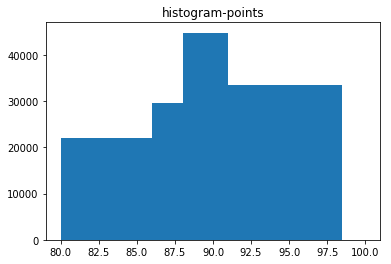

In [5]:
# 直方图
print('The histogram of points:')
hist_points, bins_points = np.histogram(points, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
print(hist_points)
print(bins_points)
print("The number of outlier of points is:", hist_points[-1])
plt.hist(points, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
plt.title("histogram-points")
plt.show()

The histogram of price:
[28649 26822 34398 23865  7241]
[   4.    17.    25.    42.    79.5 3300. ]
The number of outlier of price is: 7241


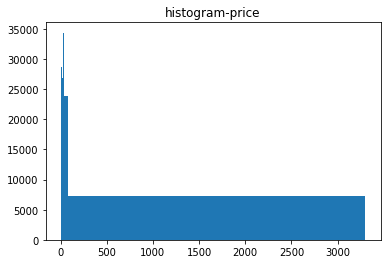

In [6]:
print('The histogram of price:')
hist_price, bins_price = np.histogram(price, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

利用盒图进行可视化

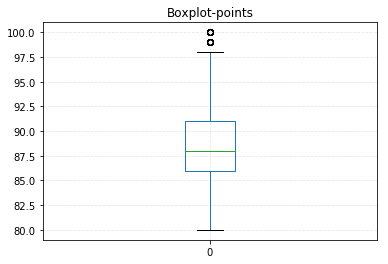

In [7]:
# 盒图
df = pd.DataFrame(points)
# print(df.describe())
df.plot.box(title="Boxplot-points")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

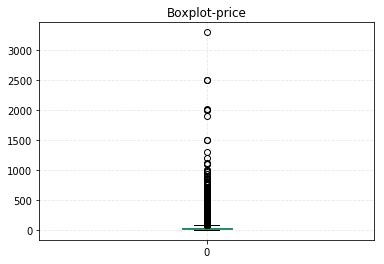

In [8]:
df = pd.DataFrame(price)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

数据缺失的处理

1）将缺失部分剔除，若有一项数据为空 则删除一行数据项；

In [9]:
print('Processing missing data')
points_new = list()
price_new = list()
with open(filename, 'r') as fins:
    reader = csv.reader(fins)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            # 若有一项数据为空 则删除一行数据项
            if line[0] and line[1] and line[2] and line[3] and line[4] \
                    and line[5] and line[6] and line[7] and line[8]\
                    and line[9] and line[10] and line[11] and line[12] \
                    and line[13]:
                points_new.append(float(line[4]))
                price_new.append(float(line[5]))

        rownum += 1
        # if rownum == 5:
        #     break

points_new = np.array(points_new)
price_new = np.array(price_new)
points_new.sort()
price_new.sort()

Processing missing data
header:  ['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


可视化比较

In [10]:
print("========================== Visual data analysis for deleting ==========================")
mins_points = points_new[0]
maxs_points = points_new[-1]
median_points = np.median(points_new)
Q1_points = my_quantile(points_new, 0.25)
Q3_points = my_quantile(points_new, 0.75)
print("Five number summary of points: min, Q1, median, Q3, max")
print(mins_points, Q1_points, median_points, Q3_points, maxs_points)
IQR_points = Q3_points - Q1_points
print("IQR of points:", IQR_points)
min_limit_points = Q1_points - (1.5 * IQR_points)
max_limit_points = Q3_points + (1.5 * IQR_points)
print("The reasonable interval of points:", min_limit_points, max_limit_points)

mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for deleting ==========================
Five number summary of points: min, Q1, median, Q3, max
80.0 88.0 90.0 92.0 100.0
IQR of points: 4.0
The reasonable interval of points: 82.0 98.0
Five number summary: min, Q1, median, Q3, max
4.0 25.0 36.0 50.0 2013.0
IQR of price: 25.0
The reasonable interval of price: -12.5 87.5


直方图和盒图

The histogram of points:
[5294 5018 6307 5744   24]
[ 80.  88.  90.  92.  98. 100.]
The number of outlier of points is: 24


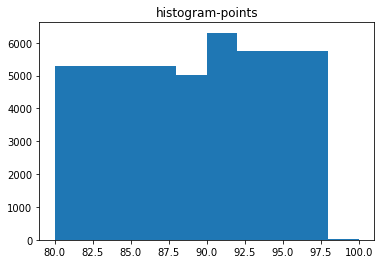

In [11]:
# 直方图
print('The histogram of points:')
hist_points, bins_points = np.histogram(points_new, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
print(hist_points)
print(bins_points)
print("The number of outlier of points is:", hist_points[-1])
plt.hist(points_new, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
plt.title("histogram-points")
plt.show()


The histogram of price:
[5340 5735 5059 5293  960]
[   4.    25.    36.    50.    87.5 2013. ]
The number of outlier of price is: 960


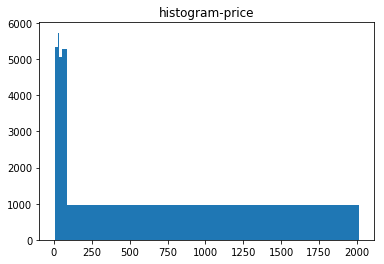

In [12]:
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

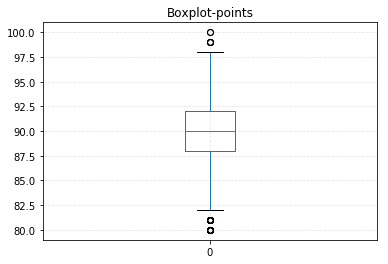

In [13]:
# 盒图
df = pd.DataFrame(points_new)
# print(df.describe())
df.plot.box(title="Boxplot-points")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

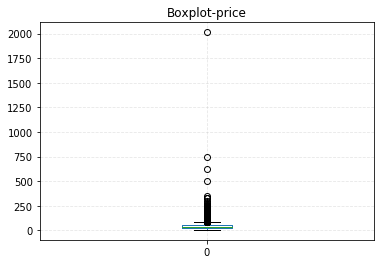

In [14]:
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

2）用最高频率值来填补缺失值

In [15]:
most_price = stats.mode(price)[0][0]
missing_data = [most_price for i in range(missing_price)]
price_new = price.tolist()
price_new += missing_data
price_new = np.array(price_new)
price_new.sort()


可视化比较

In [16]:
print("========================== Visual data analysis for repeating ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for repeating ==========================
Five number summary: min, Q1, median, Q3, max
4.0 18.0 25.0 40.0 3300.0

IQR of price: 22.0
The reasonable interval of price: -15.0 73.0


直方图和盒图

The histogram of price:
[31702 32765 30332 26066  9106]
[   4.   18.   25.   40.   73. 3300.]
The number of outlier of price is: 9106


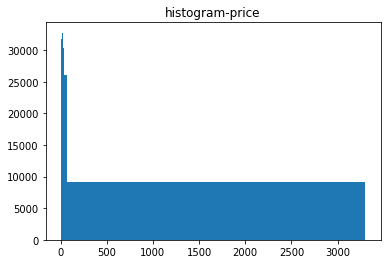

In [17]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

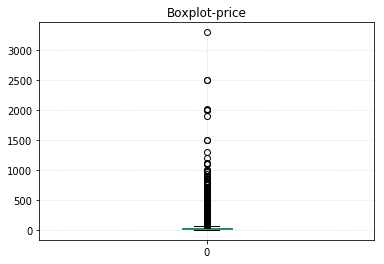

In [18]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

3）通过属性的相关关系来填补缺失值

用随机森林方法来拟合数据，将缺失值作为目标变量；
这里只有price是缺失的，points没有缺失值，因此只对price分析；

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv(filename, encoding="utf-8")  # df数据格式为DataFrame
def fill_price_regression(df):
    df_blank = df[['price', 'points']]

    # 假设points需要填充的列
    known_price = df_blank[df_blank.price.notnull()].as_matrix()
    unknown_price = df_blank[df_blank.price.isnull()].as_matrix()

    # y为目标points
    y = known_price[:, 0]
    # X为特征属性值
    X = known_price[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知price结果预测
    predicted_price = rfr.predict(unknown_price[:, 1:])
    print(predicted_price)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.price.isnull()), 'price'] = predicted_price

    return predicted_price

print("fill price with related attribute: ")
predicted_price = fill_price_regression(df)

predicted_price = np.array(predicted_price).tolist()
price_new = price.tolist()
price_new += predicted_price
price_new = np.array(price_new)
price_new.sort()


fill price with related attribute: 
[ 24.90305423  24.90305423  22.1305565   22.1305565   22.1305565
  22.1305565   19.95150905  22.1305565   36.90790814  43.21684544
  43.21684544  28.68542621  24.90305423  36.90790814  36.90790814
  36.90790814  51.05258986  51.05258986  51.05258986  51.05258986
  24.90305423  24.90305423  24.90305423  24.90305423  22.1305565
  22.1305565   28.68542621  24.90305423  19.95150905  19.95150905
  32.17260152  32.17260152  51.05258986  51.05258986  51.05258986
  51.05258986  51.05258986  32.17260152  43.21684544  43.21684544
  19.95150905  24.90305423  22.1305565   22.1305565   22.1305565
  36.90790814  36.90790814  36.90790814  36.90790814  36.90790814
  36.90790814  36.90790814  36.90790814  24.90305423  19.95150905
  28.68542621  28.68542621  28.68542621  19.95150905  19.95150905
  19.95150905  36.90790814  36.90790814  19.30977383  18.24383509
  28.68542621  19.95150905  19.30977383  19.30977383  19.30977383
  36.90790814  22.1305565   22.1305565   22

可视化比较

In [21]:
# 可视化分析
print("========================== Visual data analysis for related attribute ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for related attribute ==========================
Five number summary: min, Q1, median, Q3, max
4.0 18.0 26.0 42.0 3300.0

IQR of price: 24.0
The reasonable interval of price: -18.0 78.0


直方图和盒图

The histogram of price:
[31716 32807 31737 25703  8008]
[   4.   18.   26.   42.   78. 3300.]
The number of outlier of price is: 8008


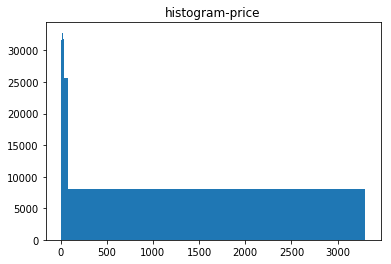

In [22]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

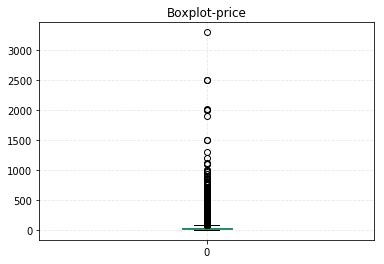

In [23]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

4）通过数据对象之间的相似性来填补缺失值

考虑对象相关性，用插值的方法来填补数据

In [24]:
file = '/Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/2.csv'
data = pd.read_csv(filename, encoding="utf-8")  # df数据格式为DataFrame
for f in data:  # 插值法填充
    data[f] = data[f].interpolate()
data.to_csv(file, encoding="utf-8", header=False, index=False)

print("fill price with related object:")
price_new = list()
with open(file, 'r') as finnew:
    reader = csv.reader(finnew)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            pr = line[5]
            price_new.append(float(pr))

        rownum += 1
        # if rownum == 5:
        #     break

price_new = np.array(price_new)
price_new.sort()

fill price with related object:
header:  ['0', 'Italy', "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'Vulkà Bianco', '87', '', 'Sicily & Sardinia', 'Etna', '', 'Kerin O’Keefe', '@kerinokeefe', 'Nicosia 2013 Vulkà Bianco  (Etna)', 'White Blend', 'Nicosia']


可视化比较

In [25]:
# 可视化分析
print("========================== Visual data analysis for related object ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for related object ==========================
Five number summary: min, Q1, median, Q3, max
4.0 17.0 25.5 42.0 3300.0

IQR of price: 25.0
The reasonable interval of price: -20.5 79.5


直方图和盒图

The histogram of price:
[29967 34988 31409 25823  7783]
[   4.    17.    25.5   42.    79.5 3300. ]
The number of outlier of price is: 7783


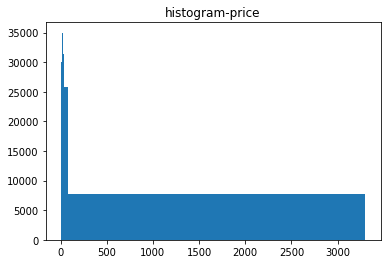

In [26]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

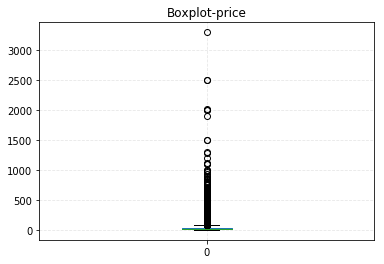

In [27]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()